In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

plt.rcParams["font.size"] = 15

In [2]:
mlflow_folder = os.path.join('/', 'data', 'mlruns', '2')
colors = ['tab:blue', 'tab:orange', 'tab:green']

In [3]:
# params.victim.model=medium, params.victim.task_name=mnist
mnist = {
    'small': '4709583298e7423ea5ca2861e9995fab',
    'medium': 'eb2930c14c0f41578d1de065c45702c5',
    'large': 'f8ab2047bf7b4bda80786b47d1c34465',
}

fashion_mnist = {
    'small': 'b154493c4ea34f79907b1ec20286feac',
    'medium': '6a58cf144d00403ba51b4badf350f19f',
    'large': 'aaedb8e4a94044fea1248ab381dd97b9',
}

fractal_1k = {
    'small': '12476ee7ee734e1e82c588eece1cf064',
    'medium': 'c6c3ebb855aa44a181da6380803cef30',
    'large': '188f18fca9324d47891b8234fd873d0e',
}

fractal_60 = {
    'small': 'b6becc11ae214f1aa50830d6c1786f44',
    'medium': '8a2748a4e8c94bb3bb20c565173f1634',
    'large': 'bac13c0860c44f49b0f7fe7635d72064',
}

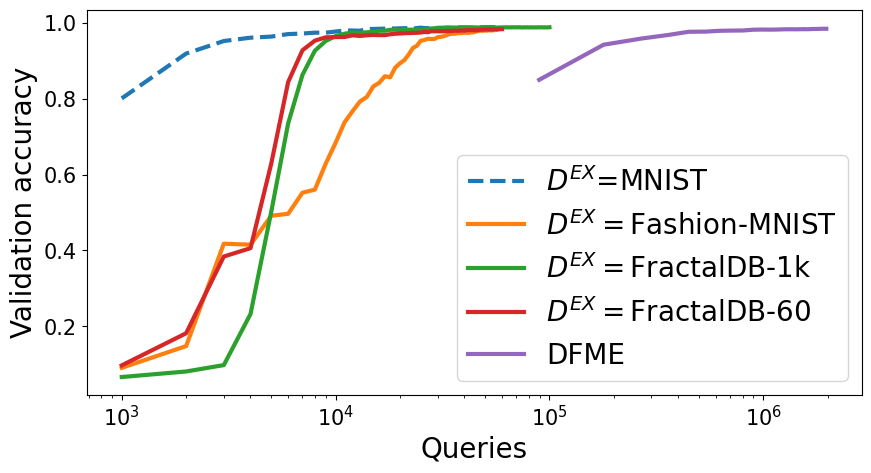

In [4]:
attack_model = 'medium'
task_name = 'mnist'
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

p = os.path.join(mlflow_folder, mnist[attack_model], 'artifacts', 'accuracy.npy')
acc = np.load(p)
ax.plot(np.arange(1, len(acc)+1)*1000, acc, '--', label='$D^{EX}$=MNIST', lw=3)

p = os.path.join(mlflow_folder, fashion_mnist[attack_model], 'artifacts', 'accuracy.npy')
acc = np.load(p)
ax.plot(np.arange(1, len(acc)+1)*1000, acc, label='$D^{EX}=$Fashion-MNIST', lw=3)

p = os.path.join(mlflow_folder, fractal_1k[attack_model], 'artifacts', 'accuracy.npy')
acc = np.load(p)
ax.plot(np.arange(1, len(acc)+1)*1000, acc, label='$D^{EX}=$FractalDB-1k', lw=3)
# ax.plot(np.arange(1, len(acc)+1)*1000, acc, '-', lw=3, label='Fractal')

p = os.path.join(mlflow_folder, fractal_60[attack_model], 'artifacts', 'accuracy.npy')
acc = np.load(p)
ax.plot(np.arange(1, len(acc)+1)*1000, acc, label='$D^{EX}=$FractalDB-60', lw=3)

p = os.path.join('.', 'dfme_result', 'checkpoint', f'{task_name}', f'student_{attack_model}', 'result.npz')
res = np.load(p, allow_pickle=True)
ax.plot(res['query'][:-1], res['acc'][:-1], '-', lw=3, label='DFME')

# ax.plot(np.arange(1000, res['query'][:-1][-1]+1), np.ones(len(np.arange(1000, res['query'][:-1][-1]+1)))*0.984, ':', lw=4, color='k',label='Target model accuracy')

ax.set_xscale('log')
ax.set_xlabel('Queries', fontsize=20)
ax.set_ylabel('Validation accuracy', fontsize=20)
ax.legend(fontsize=20)
plt.show()

fig.savefig(f'./figures/acc_{task_name}_{attack_model}.png', dpi=300, bbox_inches='tight', pad_inches=0)

In [5]:
attack_model = 'medium'
task_name = 'mnist'
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

p = os.path.join(mlflow_folder, fractal_1k[attack_model], 'artifacts', 'accuracy.npy')
acc_fr = np.load(p)

p = os.path.join('.', 'dfme_result', 'checkpoint', f'{task_name}', f'student_{attack_model}', 'result.npz')
res = np.load(p, allow_pickle=True)
acc_df = res['acc'][:-1]

res['query'][np.where(acc_df > 0.980)[0][0]] / (np.where(acc_fr > 0.980)[0][0] * 1000)

52.705882352941174

In [6]:
attack_model = 'medium'
task_name = 'fashion_mnist'
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

p = os.path.join(mlflow_folder, fractal_1k[attack_model], 'artifacts', 'accuracy.npy')
acc_fr = np.load(p)

p = os.path.join('.', 'dfme_result', 'checkpoint', f'{task_name}', f'student_{attack_model}', 'result.npz')
res = np.load(p, allow_pickle=True)
acc_df = res['acc'][:-1]

res['query'][np.where(acc_df > 0.80)[0][0]] / (np.where(acc_fr > 0.80)[0][0] * 1000)

522.6666666666666

In [7]:
np.where(acc_df > 0.80)[0][0]

34

In [8]:
# params.victim.model=medium, params.victim.task_name=fashion_mnist
mnist = {
    'small': '295392b0f8724eeeb0b9f8d6bdc9d2d5',
    'medium': '8644174c08e546c283b8023b340beae0',
    'large': '4577537a8bc64803a6b07242ea94ae06',
}

fashion_mnist = {
    'small': '1b6c3cd0da4944daac2efe9496c844db',
    'medium': '4e42c6c5ba39452a91e8bce09fd0bf03',
    'large': '0b8c7da370ab431fb9119d56b70eb30e',
}

fractal_1k = {
    'small': '22579c955e944db1abe56e37411a0de6',
    'medium': '8c999316e5c24fc6b6c20ea9477d4058',
    'large': 'd98b3a06600c47efbbcb0cf89be32c44',
}

fractal_60 = {
    'small': 'd26c208c51df4d3aaff12b013641f086',
    'medium': '64cb07db186d42cb875f55d6979eca7e',
    'large': '7de4ed6f63c249ef9529c564dcffc617',
}

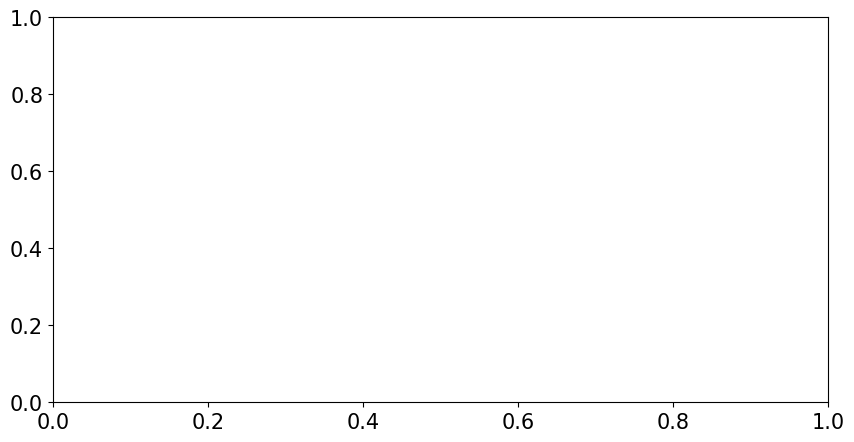

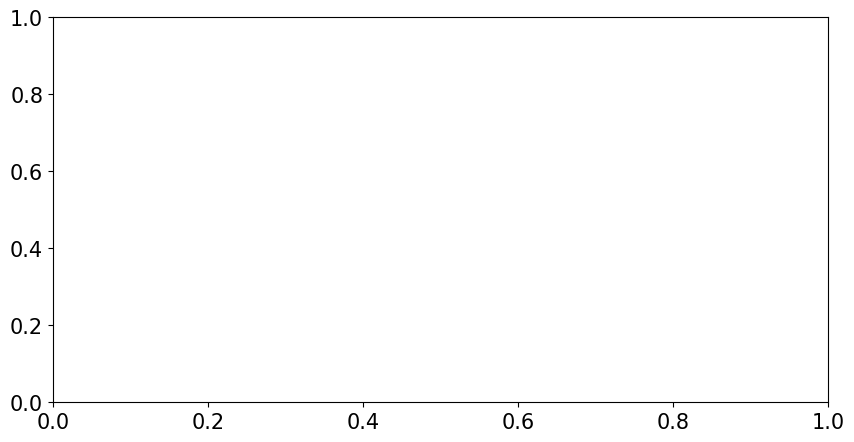

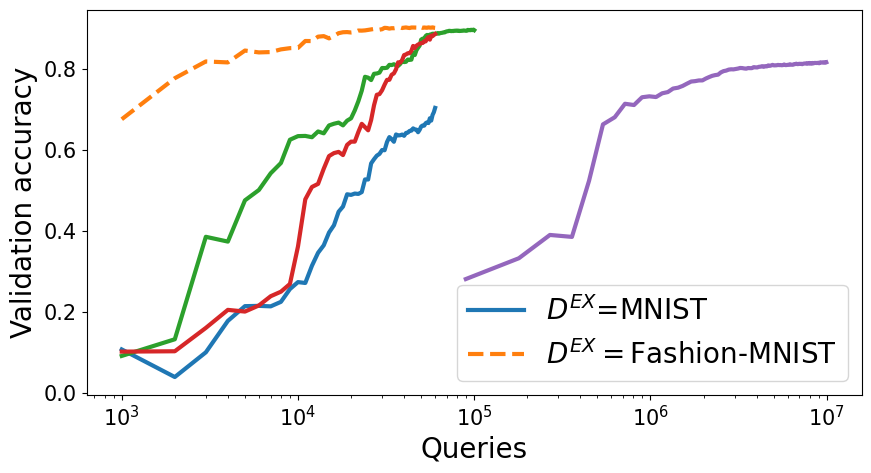

In [9]:
attack_model = 'medium'
task_name = 'fashion_mnist'
colors = ['tab:blue', 'tab:orange', 'tab:green']
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

p = os.path.join(mlflow_folder, mnist[attack_model], 'artifacts', 'accuracy.npy')
acc = np.load(p)
ax.plot(np.arange(1, len(acc)+1)*1000, acc, label='$D^{EX}$=MNIST', lw=3)

p = os.path.join(mlflow_folder, fashion_mnist[attack_model], 'artifacts', 'accuracy.npy')
acc = np.load(p)
ax.plot(np.arange(1, len(acc)+1)*1000, acc, '--', label='$D^{EX}=$Fashion-MNIST', lw=3)

p = os.path.join(mlflow_folder, fractal_1k[attack_model], 'artifacts', 'accuracy.npy')
acc = np.load(p)
ax.plot(np.arange(1, len(acc)+1)*1000, acc, lw=3)

p = os.path.join(mlflow_folder, fractal_60[attack_model], 'artifacts', 'accuracy.npy')
acc = np.load(p)
ax.plot(np.arange(1, len(acc)+1)*1000, acc, lw=3)

p = os.path.join('.', 'dfme_result', 'checkpoint', f'{task_name}', f'student_{attack_model}', 'result.npz')
res = np.load(p, allow_pickle=True)
ax.plot(res['query'][:-1], res['acc'][:-1], lw=3)

ax.set_xscale('log')
ax.set_xlabel('Queries', fontsize=20)
ax.set_ylabel('Validation accuracy', fontsize=20)
ax.legend(fontsize=20)
plt.show()

fig.savefig(f'./figures/acc_{task_name}_{attack_model}.png', dpi=300, bbox_inches='tight', pad_inches=0)